# FoldAR
##### Ian Brown, Tani Cath, Tom Cavey
##### Colorado State University
##### CS567 3D User Interfaces

This Jupyter notebook is used to process the data collected from the FoldAR iOS application. The application is designed to collect hand pose data using the Human Hand Detection model which is part of the VisionOS framework.



In [ ]:
# mount google drive (this is where you should upload your Data folder to)
from google.colab import drive
drive.mount('/content/drive')

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from prettytable import PrettyTable

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# change dir to MyDrive, and Data/ should be in there.
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


Index(['pid', 'mode', 'frame', 'date', 'time', 'thumbTip.x', 'thumbTip.y',
       'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x',
       'thumbCMC.y', 'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y',
       'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y', 'indexTip.x',
       'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y',
       'indexMCP.x', 'indexMCP.y', 'indexTip2.x', 'indexTip2.y', 'indexPIP2.x',
       'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x',
       'indexMCP2.y', 'middleTip.x', 'middleTip.y', 'middlePIP.x',
       'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x',
       'middleMCP.y', 'middleTip2.x', 'middleTip2.y', 'middlePIP2.x',
       'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x',
       'middleMCP2.y', 'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y',
       'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y', 'ringTip2.x',
       'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y'

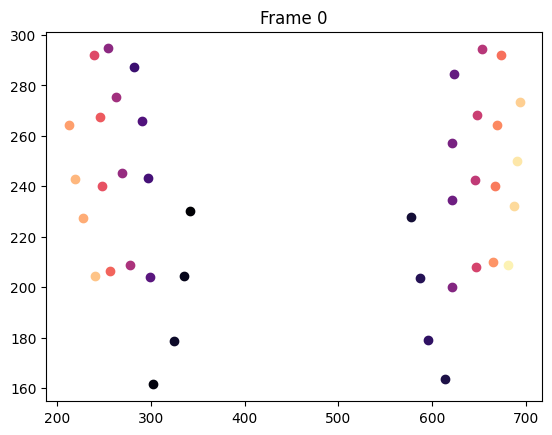

Frame 0:
Timestamp: 1900-01-01 19:25:19.782000
All Points Mean Distance: 145.46
Tips L&R Hands Mean Distance: 92.08
Tips Pairs Mean Distance: 393.93



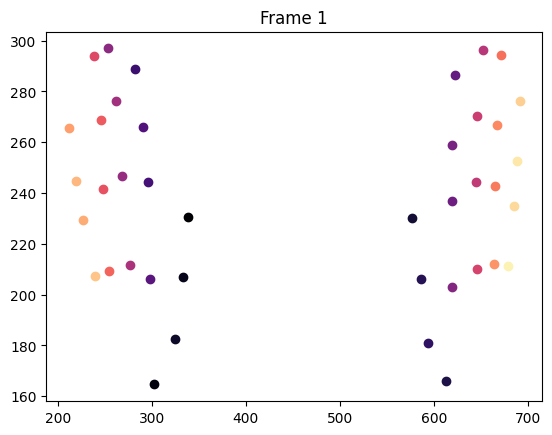

Frame 1:
Timestamp: 1900-01-01 19:25:19.820000
All Points Mean Distance: 144.52
Tips L&R Hands Mean Distance: 91.85
Tips Pairs Mean Distance: 393.50



KeyboardInterrupt: ignored

In [71]:
#plot the data

df = pd.read_csv('./Data/sessionData-102-2.csv')

# stripping spaces from columns an data...
df.columns = df.columns.str.strip()

# check columns are stripped
print(df.columns)

all_columns = ['thumbTip.x', 'thumbTip.y', 'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x', 'thumbCMC.y',
                  'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y', 'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y',
                  'indexTip.x', 'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y', 'indexMCP.x', 'indexMCP.y',
                  'indexTip2.x', 'indexTip2.y', 'indexPIP2.x', 'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x', 'indexMCP2.y',
                  'middleTip.x', 'middleTip.y', 'middlePIP.x', 'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x', 'middleMCP.y',
                  'middleTip2.x', 'middleTip2.y', 'middlePIP2.x', 'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x', 'middleMCP2.y',
                  'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y', 'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y',
                  'ringTip2.x', 'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y', 'ringDIP2.x', 'ringDIP2.y', 'ringMCP2.x', 'ringMCP2.y',
                  'littleTip.x', 'littleTip.y', 'littlePIP.x', 'littlePIP.y', 'littleDIP.x', 'littleDIP.y', 'littleMCP.x', 'littleMCP.y',
                  'littleTip2.x', 'littleTip2.y', 'littlePIP2.x', 'littlePIP2.y', 'littleDIP2.x', 'littleDIP2.y', 'littleMCP2.x', 'littleMCP2.y']

# this will allow the distances to be calculated across one hand a time, for each point starting at the tip and going down.
all_columns_reordered = [
    'thumbTip.x', 'thumbTip.y', 'indexTip.x', 'indexTip.y', 'middleTip.x', 'middleTip.y', 'ringTip.x', 'ringTip.y', 'littleTip.x', 'littleTip.y',
    'thumbIP.x', 'thumbIP.y', 'indexPIP.x', 'indexPIP.y', 'middlePIP.x', 'middlePIP.y', 'ringPIP.x', 'ringPIP.y', 'littlePIP.x', 'littlePIP.y',
    'thumbMP.x', 'thumbMP.y', 'indexDIP.x', 'indexDIP.y', 'middleDIP.x', 'middleDIP.y', 'ringDIP.x', 'ringDIP.y', 'littleDIP.x', 'littleDIP.y',
    'thumbCMC.x', 'thumbCMC.y', 'indexMCP.x', 'indexMCP.y', 'middleMCP.x', 'middleMCP.y', 'ringMCP.x', 'ringMCP.y', 'littleMCP.x', 'littleMCP.y',
    'thumbTip2.x', 'thumbTip2.y', 'indexTip2.x', 'indexTip2.y', 'middleTip2.x', 'middleTip2.y', 'ringTip2.x', 'ringTip2.y', 'littleTip2.x', 'littleTip2.y',
    'thumbIP2.x', 'thumbIP2.y', 'indexPIP2.x', 'indexPIP2.y', 'middlePIP2.x', 'middlePIP2.y', 'ringPIP2.x', 'ringPIP2.y', 'littlePIP2.x', 'littlePIP2.y',
    'thumbMP2.x', 'thumbMP2.y', 'indexDIP2.x', 'indexDIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'ringDIP2.x', 'ringDIP2.y', 'littleDIP2.x', 'littleDIP2.y',
    'thumbCMC2.x', 'thumbCMC2.y', 'indexMCP2.x', 'indexMCP2.y', 'middleMCP2.x', 'middleMCP2.y', 'ringMCP2.x', 'ringMCP2.y', 'littleMCP2.x', 'littleMCP2.y'
]



finger_columns = ['thumbTip', 'thumbIP', 'thumbMP', 'thumbCMC', 'thumbTip2', 'thumbIP2', 'thumbMP2', 'thumbCMC2',
                  'indexTip', 'indexPIP', 'indexDIP', 'indexMCP', 'indexTip2', 'indexPIP2', 'indexDIP2', 'indexMCP2',
                  'middleTip', 'middlePIP', 'middleDIP', 'middleMCP', 'middleTip2', 'middlePIP2', 'middleDIP2', 'middleMCP2',
                  'ringTip', 'ringPIP', 'ringDIP', 'ringMCP', 'ringTip2', 'ringPIP2', 'ringDIP2', 'ringMCP2',
                  'littleTip', 'littlePIP', 'littleDIP', 'littleMCP', 'littleTip2', 'littlePIP2', 'littleDIP2', 'littleMCP2']

fingertip_columns = [
    'thumbTip.x', 'thumbTip.y', 'thumbTip2.x', 'thumbTip2.y',
    'indexTip.x', 'indexTip.y', 'indexTip2.x', 'indexTip2.y',
    'middleTip.x', 'middleTip.y', 'middleTip2.x', 'middleTip2.y',
    'ringTip.x', 'ringTip.y', 'ringTip2.x', 'ringTip2.y',
    'littleTip.x', 'littleTip.y', 'littleTip2.x', 'littleTip2.y'
]

# this woul dbe for each tip on one hand consecutively.
fingertip_columns_reordered = [
      'thumbTip.x', 'thumbTip.y', 'indexTip.x', 'indexTip.y',
      'middleTip.x', 'middleTip.y', 'ringTip.x', 'ringTip.y',
      'littleTip.x', 'littleTip.y', 'thumbTip2.x', 'thumbTip2.y',
      'indexTip2.x', 'indexTip2.y', 'middleTip2.x', 'middleTip2.y',
      'ringTip2.x', 'ringTip2.y', 'littleTip2.x', 'littleTip2.y'
    ]

frame_means  = []
tip_means    = []
finger_means = []
tip_hand_means = []

# for each frame in dataframe
for i, frame in df.groupby('frame'):
    timestamp_datetime = datetime.strptime(frame['time'].iloc[0], ' %H:%M:%S.%f')

    distances = np.sqrt(np.diff(frame[all_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)

    tipDistances = np.sqrt(np.diff(frame[fingertip_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)

    tipDistancesHand = np.sqrt(np.diff(frame[fingertip_columns_reordered].values.reshape(-1, 2), axis=0)**2).sum(axis=1)

    frame_mean = np.mean(distances)
    tip_mean = np.mean(tipDistances)
    tip_hand_mean = np.mean(tipDistancesHand)
    # frame_means.append(frame_mean)
    # tip_means.append(tip_mean)
    # tip_hand_means.append(tip_hand_mean)

    plt.figure(i)
    plt.title(f'Frame {i}')
    for j, finger in enumerate(finger_columns):
        color = plt.cm.magma(j / len(finger_columns))
        plt.plot(frame[f"{finger}.x"], frame[f"{finger}.y"], 'o', label=finger, color=color)
    plt.show()

    print(f'Frame {i}:')
    print(f'Timestamp: {timestamp_datetime}')
    print(f'All Points Mean Distance: {frame_mean:.2f}')
    print(f'Tips L&R Hands Mean Distance: {tip_hand_mean:.2f}')
    print(f'Tips Pairs Mean Distance: {tip_mean:.2f}')
    print()


### Grouped finger tip data
calculateEuclideanDistanceMean( file_path ), this function will take in the file path of the Data/ directory. This should be mounted using the google.colab.drive.mount line. The csv file is read as a pandas dataframe. Process all the finger tip points and organize them by userId. Then calculates the euclidean distance between the finger pairs. For example, the distance between the left and right thumb, or the left and right index finger.

By capturing the mean of all pairwise tip distances, we can determine a general hand position of how close the the users hands are, the distance between two fingertip points can also be skewed while performing folding manuevers, which may provide some interesting data about unique folding patterns or strategies. By averaging over all the frames it generalizes well in graphs.

In [ ]:
def calculateEuclideanDistanceMean(file_path):

    frame_means = []
    fingertip_columns = [
        'thumbTip.x', 'thumbTip.y', 'thumbTip2.x', 'thumbTip2.y',
        'indexTip.x', 'indexTip.y', 'indexTip2.x', 'indexTip2.y',
        'middleTip.x', 'middleTip.y', 'middleTip2.x', 'middleTip2.y',
        'ringTip.x', 'ringTip.y', 'ringTip2.x', 'ringTip2.y',
        'littleTip.x', 'littleTip.y', 'littleTip2.x', 'littleTip2.y'
    ]

    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()

    for i, frame in df.groupby('frame'):
        tip_distances = np.sqrt(np.diff(frame[fingertip_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)
        frame_means.append(np.mean(tip_distances))

    file_summary_metric = np.mean(frame_means)

    return file_summary_metric

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/Data/'
file_pattern = 'sessionData-*.csv'
summary_metrics = {}

# make list of files in data/
file_list = glob.glob(os.path.join(folder_path, file_pattern))

for file_path in file_list:
    # get user id from file name
    user_id = file_path.split('-')[1]

    # calculate the mean euclidean distance over all frames by
    summary_metric = calculateEuclideanDistanceMean(file_path)
    summary_metrics[user_id] = summary_metric

print(summary_metrics)

{'208': 330.32779842095954, '206': 250.6008626502644, '105': 150.42186422041172, '300': 100.3699206686209, '107': 110.80351932924378, '302': 78.10754653421732, '106': 149.29232412663256, '102': 132.3983812625372, '205': 203.17726749612376, '210': 189.2670322073448, '301': 112.0332876528487, '104': 175.36324734761556, '108': 158.660587287415, '103': 151.6987266706704}


This shows the overall mean tip distances for each user. As a mean of means, there's not much information that we can gather from this alone, but compared to eachother we can get an idea of the variability of the average distance for a user over all experiments.

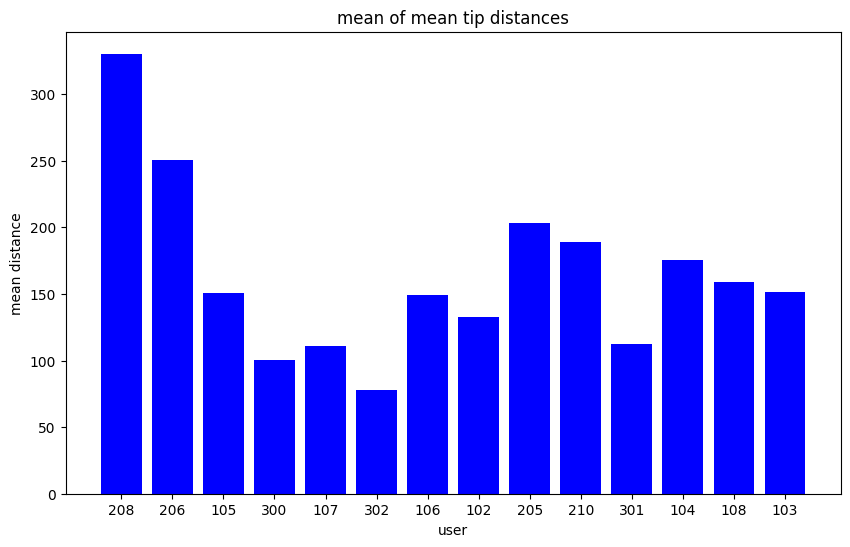

In [ ]:
user_ids = list(summary_metrics.keys())
summary_values = list(summary_metrics.values())

# Plot the summary metrics
plt.figure(figsize=(10, 6))
plt.bar(user_ids, summary_values, color='blue')
plt.xlabel('user')
plt.ylabel('mean distance')
plt.title('mean of mean tip distances')
plt.show()

In [81]:
# creatre list of ALL dataframes
all_dataframes = []

# samples = glob.glob(os.path.join('Data/', 'sessionData-108-*.csv'))
samples = glob.glob(os.path.join('Data/', 'sessionData-108-0.csv'))

for sample in samples:
    df = pd.read_csv(sample)

    # stripping spaces from columns an data...
    df.columns = df.columns.str.strip()
    all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)

df = combined_df

# check columns are stripped
print(df.columns)

all_columns = ['thumbTip.x', 'thumbTip.y', 'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x', 'thumbCMC.y',
                  'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y', 'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y',
                  'indexTip.x', 'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y', 'indexMCP.x', 'indexMCP.y',
                  'indexTip2.x', 'indexTip2.y', 'indexPIP2.x', 'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x', 'indexMCP2.y',
                  'middleTip.x', 'middleTip.y', 'middlePIP.x', 'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x', 'middleMCP.y',
                  'middleTip2.x', 'middleTip2.y', 'middlePIP2.x', 'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x', 'middleMCP2.y',
                  'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y', 'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y',
                  'ringTip2.x', 'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y', 'ringDIP2.x', 'ringDIP2.y', 'ringMCP2.x', 'ringMCP2.y',
                  'littleTip.x', 'littleTip.y', 'littlePIP.x', 'littlePIP.y', 'littleDIP.x', 'littleDIP.y', 'littleMCP.x', 'littleMCP.y',
                  'littleTip2.x', 'littleTip2.y', 'littlePIP2.x', 'littlePIP2.y', 'littleDIP2.x', 'littleDIP2.y', 'littleMCP2.x', 'littleMCP2.y']


finger_columns = ['thumbTip', 'thumbIP', 'thumbMP', 'thumbCMC', 'thumbTip2', 'thumbIP2', 'thumbMP2', 'thumbCMC2',
                  'indexTip', 'indexPIP', 'indexDIP', 'indexMCP', 'indexTip2', 'indexPIP2', 'indexDIP2', 'indexMCP2',
                  'middleTip', 'middlePIP', 'middleDIP', 'middleMCP', 'middleTip2', 'middlePIP2', 'middleDIP2', 'middleMCP2',
                  'ringTip', 'ringPIP', 'ringDIP', 'ringMCP', 'ringTip2', 'ringPIP2', 'ringDIP2', 'ringMCP2',
                  'littleTip', 'littlePIP', 'littleDIP', 'littleMCP', 'littleTip2', 'littlePIP2', 'littleDIP2', 'littleMCP2']

fingertip_columns = [
    'thumbTip.x', 'thumbTip.y', 'thumbTip2.x', 'thumbTip2.y',
    'indexTip.x', 'indexTip.y', 'indexTip2.x', 'indexTip2.y',
    'middleTip.x', 'middleTip.y', 'middleTip2.x', 'middleTip2.y',
    'ringTip.x', 'ringTip.y', 'ringTip2.x', 'ringTip2.y',
    'littleTip.x', 'littleTip.y', 'littleTip2.x', 'littleTip2.y'
]

fingertip_columns_reordered = [
      'thumbTip.x', 'thumbTip.y', 'indexTip.x', 'indexTip.y',
      'middleTip.x', 'middleTip.y', 'ringTip.x', 'ringTip.y',
      'littleTip.x', 'littleTip.y', 'thumbTip2.x', 'thumbTip2.y',
      'indexTip2.x', 'indexTip2.y', 'middleTip2.x', 'middleTip2.y',
      'ringTip2.x', 'ringTip2.y', 'littleTip2.x', 'littleTip2.y'
    ]

frame_means  = []
tip_means    = []
finger_means = []

# for each frame in dataframe
for i, frame in df.groupby('frame'):
    timestamp_datetime = datetime.strptime(frame['time'].iloc[0], ' %H:%M:%S.%f')

    # Euclidean distances
    # all points
    distances = np.sqrt(np.diff(frame[all_columns].values.reshape(-1, 2), axis=0)**2).sum(axis=1)

    #tips
    tipDistances = np.sqrt(np.diff(frame[fingertip_columns_reordered].values.reshape(-1, 2), axis=0)**2).sum(axis=1)

    # calc statistics for each frame
    frame_mean = np.mean(distances)
    tip_mean = np.mean(tipDistances)
    frame_means.append(frame_mean)
    tip_means.append(tip_mean)
    # frame_min = np.min(distances[distances > 0])
    # frame_max = np.max(distances)
    # frame_std = np.std(distances)

    window_size = 20
    all_moving_average = np.convolve(frame_means, np.ones(window_size)/window_size, mode='valid')
    tips_moving_average = np.convolve(tip_means, np.ones(window_size)/window_size, mode='valid')


    print(f'Frame {i}:')
    print(f'Timestamp: {timestamp_datetime}')
    print(f'Mean Distance: {frame_mean:.2f}')
    # print(f'Minimum Distance: {frame_min:.2f}')
    # print(f'Maximum Distance: {frame_max:.2f}')
    # print(f'Standard Deviation: {frame_std:.2f}')
    print()


Index(['pid', 'mode', 'frame', 'date', 'time', 'thumbTip.x', 'thumbTip.y',
       'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x',
       'thumbCMC.y', 'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y',
       'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y', 'indexTip.x',
       'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y',
       'indexMCP.x', 'indexMCP.y', 'indexTip2.x', 'indexTip2.y', 'indexPIP2.x',
       'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x',
       'indexMCP2.y', 'middleTip.x', 'middleTip.y', 'middlePIP.x',
       'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x',
       'middleMCP.y', 'middleTip2.x', 'middleTip2.y', 'middlePIP2.x',
       'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x',
       'middleMCP2.y', 'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y',
       'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y', 'ringTip2.x',
       'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y'

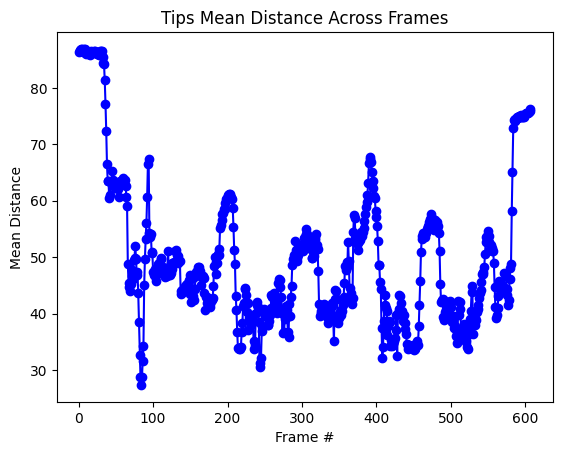

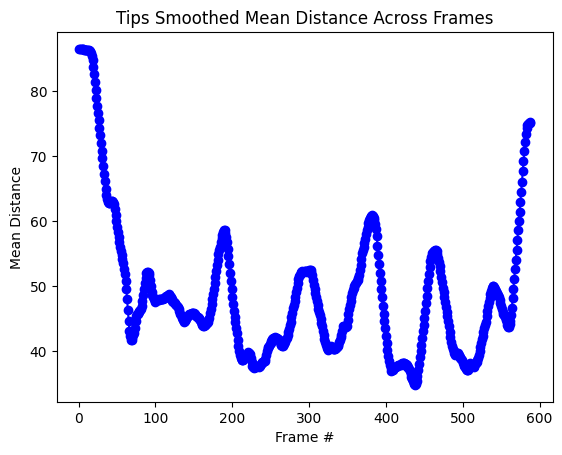

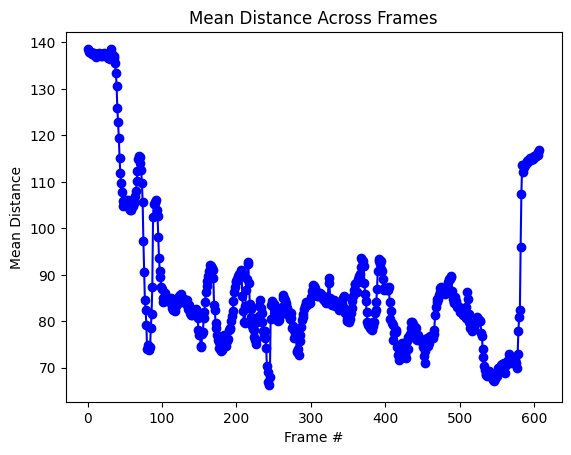

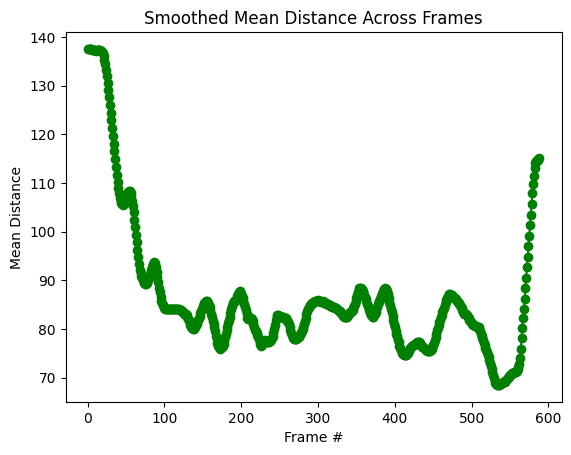

In [82]:
plt.plot(range(1, len(tip_means) + 1), tip_means, marker='o', linestyle='-', color='b')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Tips Mean Distance Across Frames')
plt.show()

plt.plot(range(1, len(tips_moving_average) + 1)[:len(tips_moving_average)], tips_moving_average, marker='o', linestyle='-', color='b')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Tips Smoothed Mean Distance Across Frames')
plt.show()

plt.plot(range(1, len(frame_means) + 1), frame_means, marker='o', linestyle='-', color='b')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Mean Distance Across Frames')
plt.show()

plt.plot(range(1, len(all_moving_average) + 1)[:len(all_moving_average)], all_moving_average, marker='o', linestyle='-', color='g')
plt.xlabel('Frame #')
plt.ylabel('Mean Distance')
plt.title('Smoothed Mean Distance Across Frames')
plt.show()

This will plot the entire trajectory of a point over all frames

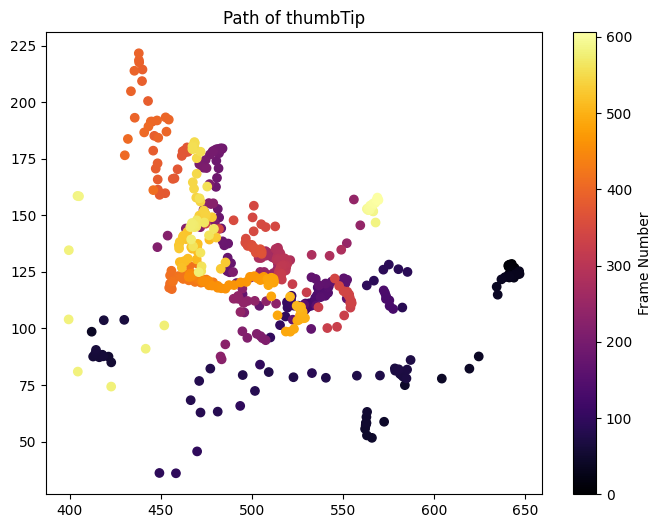

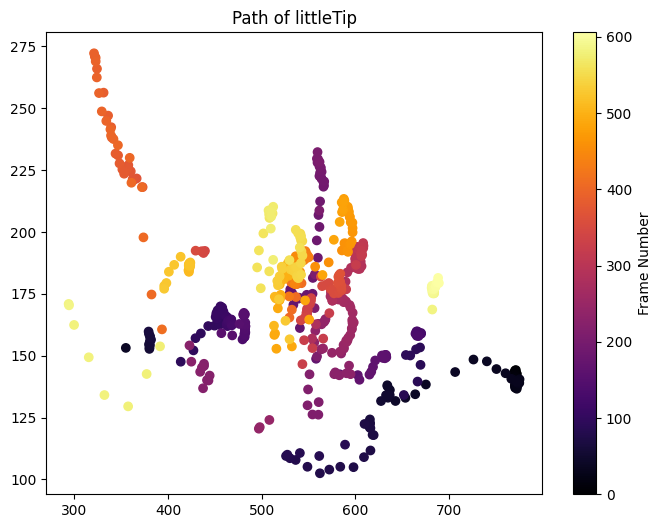

In [ ]:
point_to_plot = 'thumbTip'
x_coords = df[f'{point_to_plot}.x']
y_coords = df[f'{point_to_plot}.y']

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, label=f'{point_to_plot} Path', c=range(len(x_coords)), cmap='inferno')

plt.title(f'Path of {point_to_plot}')
plt.colorbar(label='Frame Number')
# plt.grid(True)
plt.show()


point_to_plot = 'littleTip'
x_coords = df[f'{point_to_plot}.x']
y_coords = df[f'{point_to_plot}.y']

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, label=f'{point_to_plot} Path', c=range(len(x_coords)), cmap='inferno')

plt.title(f'Path of {point_to_plot}')
plt.colorbar(label='Frame Number')
# plt.grid(True)
plt.show()

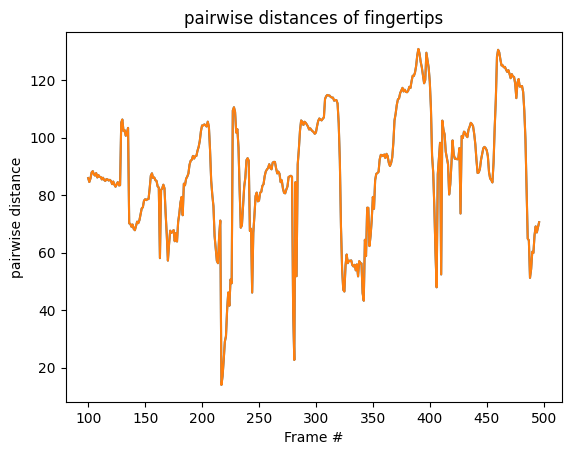

In [ ]:
# read and remove starting and ending frames from CSV
# (this contains the starting and ending positions of the experiment)
# df = pd.read_csv('sessionData-200_7-0.csv')
df = df[50:-55]

# strip any whitespace from columns and data
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# columns to plot
fingertip_columns = ['littleTip', 'thumbTip']

# pairwise euclidean distances (using fingertips)
for fingertip1 in fingertip_columns:
    for fingertip2 in fingertip_columns:
        if fingertip1 != fingertip2:
            df[f'{fingertip1}_{fingertip2}_distance'] = np.sqrt((df[f'{fingertip1}.x'] - df[f'{fingertip2}.x'])**2 +
                                                                (df[f'{fingertip1}.y'] - df[f'{fingertip2}.y'])**2)
#plots
for fingertip1 in fingertip_columns:
    for fingertip2 in fingertip_columns:
        if fingertip1 != fingertip2:
            distance_column = f'{fingertip1}_{fingertip2}_distance'
            plt.plot(df['frame'], df[distance_column], label=f'{fingertip1} to {fingertip2}')

plt.xlabel('Frame #')
plt.ylabel('pairwise distance')
plt.title('pairwise distances of fingertips')
plt.show()

In [ ]:
def calculateEuclideanDistanceMeanWithSplits(file_path, num_splits):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()

    mean_distances = []

    fingertip_columns = [
        'thumbTip.x', 'thumbTip.y', 'thumbTip2.x', 'thumbTip2.y',
        'indexTip.x', 'indexTip.y', 'indexTip2.x', 'indexTip2.y',
        'middleTip.x', 'middleTip.y', 'middleTip2.x', 'middleTip2.y',
        'ringTip.x', 'ringTip.y', 'ringTip2.x', 'ringTip2.y',
        'littleTip.x', 'littleTip.y', 'littleTip2.x', 'littleTip2.y'
    ]


    fingertip_columns = ['thumbTip.x', 'thumbTip.y', 'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x', 'thumbCMC.y',
                  'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y', 'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y',
                  'indexTip.x', 'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y', 'indexMCP.x', 'indexMCP.y',
                  'indexTip2.x', 'indexTip2.y', 'indexPIP2.x', 'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x', 'indexMCP2.y',
                  'middleTip.x', 'middleTip.y', 'middlePIP.x', 'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x', 'middleMCP.y',
                  'middleTip2.x', 'middleTip2.y', 'middlePIP2.x', 'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x', 'middleMCP2.y',
                  'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y', 'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y',
                  'ringTip2.x', 'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y', 'ringDIP2.x', 'ringDIP2.y', 'ringMCP2.x', 'ringMCP2.y',
                  'littleTip.x', 'littleTip.y', 'littlePIP.x', 'littlePIP.y', 'littleDIP.x', 'littleDIP.y', 'littleMCP.x', 'littleMCP.y',
                  'littleTip2.x', 'littleTip2.y', 'littlePIP2.x', 'littlePIP2.y', 'littleDIP2.x', 'littleDIP2.y', 'littleMCP2.x', 'littleMCP2.y']

    fingertip_columns_reordered = [
      'thumbTip.x', 'thumbTip.y', 'indexTip.x', 'indexTip.y',
      'middleTip.x', 'middleTip.y', 'ringTip.x', 'ringTip.y',
      'littleTip.x', 'littleTip.y', 'thumbTip2.x', 'thumbTip2.y',
      'indexTip2.x', 'indexTip2.y', 'middleTip2.x', 'middleTip2.y',
      'ringTip2.x', 'ringTip2.y', 'littleTip2.x', 'littleTip2.y'
    ]

    # get the number of frames so we can split it up
    frame_count = len(df)
    split_size = frame_count // num_splits

    for i in range(num_splits):
        start = i * split_size
        end = (i + 1) * split_size if i != num_splits - 1 else frame_count

        mean_distance = np.mean(np.sqrt(np.diff(df[fingertip_columns].values[start:end].reshape(-1, 2), axis=0)**2).sum(axis=1))
        mean_distances.append(mean_distance)

    return mean_distances

folder_path = '/content/drive/MyDrive/Colab Notebooks/Data/'
file_pattern = 'sessionData-*-*.csv'
file_list = glob.glob(os.path.join(folder_path, file_pattern))

num_splits = 5

summary_metrics = {'user_id': [], 'trial_num': []}
for i in range(num_splits):
    summary_metrics[f'mean_distance_{i+1}'] = []

for file_path in file_list:

    # user_id and trial_num from the file name
    file_name = os.path.basename(file_path)
    parts = file_name.split('-')
    user_id = parts[1]
    trial_num = parts[2].split('.')[0] #drop .csv

    mean_distances = calculateEuclideanDistanceMeanWithSplits(file_path, num_splits)

    summary_metrics['user_id'].append(user_id)
    summary_metrics['trial_num'].append(trial_num)

    for i, mean_distance in enumerate(mean_distances):
        summary_metrics[f'mean_distance_{i+1}'].append(mean_distance)

# round to 2 decimal places
df_summary = pd.DataFrame(summary_metrics).round(2)
print(df_summary)


   user_id trial_num  mean_distance_1  mean_distance_2  mean_distance_3  \
0      208         0           238.06           172.43           117.76   
1      206         2           213.91           117.97           104.66   
2      105         0           117.72            84.92            77.81   
3      300         1            65.50            63.10            64.18   
4      107         2            93.93            87.00            77.39   
5      206         1           224.67           126.28           118.13   
6      105         1           107.47            74.59            74.98   
7      302         2            81.52            63.04            54.61   
8      300         0            71.74            63.64            61.17   
9      302         0            71.27            63.61            62.90   
10     300         2            71.24            62.83            61.48   
11     106         2           105.75            87.37            90.63   
12     107         1     

In [ ]:
df_sorted = df_summary.sort_values(by=['user_id', 'trial_num']).reset_index(drop=True)

table = PrettyTable()
table.field_names = list(df_sorted.columns)

for _, row in df_sorted.iterrows():
    table.add_row(row)

print(table)

+---------+-----------+-----------------+-----------------+-----------------+-----------------+-----------------+
| user_id | trial_num | mean_distance_1 | mean_distance_2 | mean_distance_3 | mean_distance_4 | mean_distance_5 |
+---------+-----------+-----------------+-----------------+-----------------+-----------------+-----------------+
|   102   |     0     |      113.69     |      84.66      |      71.92      |      72.67      |      76.45      |
|   102   |     1     |      162.95     |      126.04     |      89.81      |      80.49      |      86.35      |
|   102   |     2     |      102.51     |      89.07      |      84.76      |      75.56      |      70.19      |
|   103   |     0     |      126.98     |      86.44      |      86.91      |      82.45      |      90.25      |
|   103   |     1     |      106.05     |      90.26      |      81.52      |      81.45      |      87.94      |
|   103   |     2     |      108.74     |       84.8      |      84.03      |       75.1

In [72]:
def calculateEuclideanDistanceMeanWithSplits(file_path, num_splits):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()

    mean_distances = []

    fingertip_columns = [
        'thumbTip.x', 'thumbTip.y', 'thumbTip2.x', 'thumbTip2.y',
        'indexTip.x', 'indexTip.y', 'indexTip2.x', 'indexTip2.y',
        'middleTip.x', 'middleTip.y', 'middleTip2.x', 'middleTip2.y',
        'ringTip.x', 'ringTip.y', 'ringTip2.x', 'ringTip2.y',
        'littleTip.x', 'littleTip.y', 'littleTip2.x', 'littleTip2.y'
    ]


    fingertip_columns = ['thumbTip.x', 'thumbTip.y', 'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x', 'thumbCMC.y',
                  'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y', 'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y',
                  'indexTip.x', 'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y', 'indexMCP.x', 'indexMCP.y',
                  'indexTip2.x', 'indexTip2.y', 'indexPIP2.x', 'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x', 'indexMCP2.y',
                  'middleTip.x', 'middleTip.y', 'middlePIP.x', 'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x', 'middleMCP.y',
                  'middleTip2.x', 'middleTip2.y', 'middlePIP2.x', 'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x', 'middleMCP2.y',
                  'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y', 'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y',
                  'ringTip2.x', 'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y', 'ringDIP2.x', 'ringDIP2.y', 'ringMCP2.x', 'ringMCP2.y',
                  'littleTip.x', 'littleTip.y', 'littlePIP.x', 'littlePIP.y', 'littleDIP.x', 'littleDIP.y', 'littleMCP.x', 'littleMCP.y',
                  'littleTip2.x', 'littleTip2.y', 'littlePIP2.x', 'littlePIP2.y', 'littleDIP2.x', 'littleDIP2.y', 'littleMCP2.x', 'littleMCP2.y']

    fingertip_columns_reordered = [
      'thumbTip.x', 'thumbTip.y', 'indexTip.x', 'indexTip.y',
      'middleTip.x', 'middleTip.y', 'ringTip.x', 'ringTip.y',
      'littleTip.x', 'littleTip.y', 'thumbTip2.x', 'thumbTip2.y',
      'indexTip2.x', 'indexTip2.y', 'middleTip2.x', 'middleTip2.y',
      'ringTip2.x', 'ringTip2.y', 'littleTip2.x', 'littleTip2.y'
    ]

    # get the number of frames so we can split it up
    frame_count = len(df)
    split_size = frame_count // num_splits

    for i in range(num_splits):
        start = i * split_size
        end = (i + 1) * split_size if i != num_splits - 1 else frame_count

        mean_distance = np.mean(np.sqrt(np.diff(df[fingertip_columns_reordered].values[start:end].reshape(-1, 2), axis=0)**2).sum(axis=1))
        mean_distances.append(mean_distance)

    return mean_distances

folder_path = '/content/drive/MyDrive/Colab Notebooks/Data/'
file_pattern = 'sessionData-*-*.csv'
file_list = glob.glob(os.path.join(folder_path, file_pattern))

num_splits = 5

summary_metrics = {'user_id': [], 'trial_num': []}
for i in range(num_splits):
    summary_metrics[f'mean_distance_{i+1}'] = []

for file_path in file_list:

    # user_id and trial_num from the file name
    file_name = os.path.basename(file_path)
    parts = file_name.split('-')
    user_id = parts[1]
    trial_num = parts[2].split('.')[0] #drop .csv

    mean_distances = calculateEuclideanDistanceMeanWithSplits(file_path, num_splits)

    summary_metrics['user_id'].append(user_id)
    summary_metrics['trial_num'].append(trial_num)

    for i, mean_distance in enumerate(mean_distances):
        summary_metrics[f'mean_distance_{i+1}'].append(mean_distance)

# round to 2 decimal places
df_summary = pd.DataFrame(summary_metrics).round(2)
print(df_summary)


   user_id trial_num  mean_distance_1  mean_distance_2  mean_distance_3  \
0      208         0           170.53           122.85            62.94   
1      206         2           173.47            91.35            64.33   
2      105         0            88.13            65.64            55.04   
3      300         1            51.58            44.26            38.18   
4      107         2            61.54            40.92            44.96   
5      206         1           198.39            77.90            59.20   
6      105         1            81.04            60.10            52.79   
7      302         2            60.74            31.35            28.24   
8      300         0            57.11            46.48            36.93   
9      302         0            50.10            36.65            41.64   
10     300         2            50.21            37.38            32.59   
11     106         2            67.60            62.50            54.05   
12     107         1     

In [73]:
df_sorted = df_summary.sort_values(by=['user_id', 'trial_num']).reset_index(drop=True)

table = PrettyTable()
table.field_names = list(df_sorted.columns)

for _, row in df_sorted.iterrows():
    table.add_row(row)

print(table)

+---------+-----------+-----------------+-----------------+-----------------+-----------------+-----------------+
| user_id | trial_num | mean_distance_1 | mean_distance_2 | mean_distance_3 | mean_distance_4 | mean_distance_5 |
+---------+-----------+-----------------+-----------------+-----------------+-----------------+-----------------+
|   102   |     0     |      83.73      |      50.42      |      37.31      |      32.96      |      43.98      |
|   102   |     1     |      133.81     |      97.82      |      59.74      |      37.73      |      60.69      |
|   102   |     2     |      65.27      |      45.99      |       42.0      |      37.74      |      38.07      |
|   103   |     0     |      107.68     |      54.29      |      55.44      |      52.82      |      71.01      |
|   103   |     1     |      83.87      |      62.72      |      52.35      |      54.66      |      81.61      |
|   103   |     2     |      86.11      |      50.09      |      60.19      |      51.85